In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


#### Firstly, enter the paths of the corresonding input files in the code cell below.

In [13]:
SENTIMENTS = "/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject/sentiment/sentiment_Switzerland_comments_cleaned_pretty.json"
CLEANED = "/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject/raw data/pretty jsons/Switzerland_comments_cleaned_pretty.json" #HAS TO BE X_cleaned_pretty.json
OUTPUT = "/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject/visuals/df_csv/"

# Important:

- This script is designed in a way that if the paths above are set correctly, it can be ran all the way to the end.
- If the paths are not set correctly, the script might behave very differently than expected.
- MAKE SURE TO SET THE PATHS CORRECTLY.

# Conversion

#### Converting the input files to the required format and then merging them into a single file that can be used for manipulation and visualization

#### JSON to CSV converter

In [15]:
with open(SENTIMENTS, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df[["Polarity", "Subjectivity"]] = df["Text"].apply(pd.Series)

df.drop(columns=["Text"], inplace = True)

df.to_csv(OUTPUT + "df_sent.csv", index=False)

In [26]:
with open(CLEANED, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df["Text"] = df["Text"].str.replace("[^\w\s]", "", regex=True)
df["Text"] = df["Text"].str.replace("\n", " ", regex=True)
df["Text"] = df["Text"].str.replace("\r", " ", regex=True)

df.to_csv(OUTPUT + "df_cleaned.csv", index=False)


#### Combining the two newly generated csv files on their common column

In [27]:
df_sent = pd.read_csv(OUTPUT + "df_sent.csv")
df_cleaned = pd.read_csv(OUTPUT + "df_cleaned.csv")

df_merged = pd.merge(df_cleaned, df_sent, on="Date", how="inner").to_csv(OUTPUT + "df_merged.csv", index=False)

# Start of DataFrame manipulation

In [20]:
MERGED = OUTPUT + "df_merged.csv"

In [21]:
df = pd.read_csv(MERGED)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.head()

,Text,Polarity,Subjectivity
Date,,,
2008-07-30 18:59:43,oops I added an extra is,0.000000,0.100000
2008-08-03 15:59:01,Something to remember in this is that the tool...,0.060417,0.489583
2008-09-04 15:13:39,The modern witch hunt,0.200000,0.300000
2008-10-21 07:50:04,i can quit anytime i want,0.000000,0.000000
2008-10-22 14:02:30,If taxes werent so damn high and wasted on she...,0.053333,0.246667


### EDA

In [22]:
print("DataFrame Description")
print(df.describe())

print("\nisnull sum:")
print(df.isnull().sum())
print("\nDtypes in DataFrame")
print(df.dtypes)


DataFrame Description
            Polarity   Subjectivity
count  757539.000000  757539.000000
mean        0.082912       0.375346
std         0.239365       0.294808
min        -1.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.404762
75%         0.195833       0.575000
max         1.000000       1.000000

isnull sum:
Text            1309
Polarity           0
Subjectivity       0
dtype: int64

Dtypes in DataFrame
Text             object
Polarity        float64
Subjectivity    float64
dtype: object


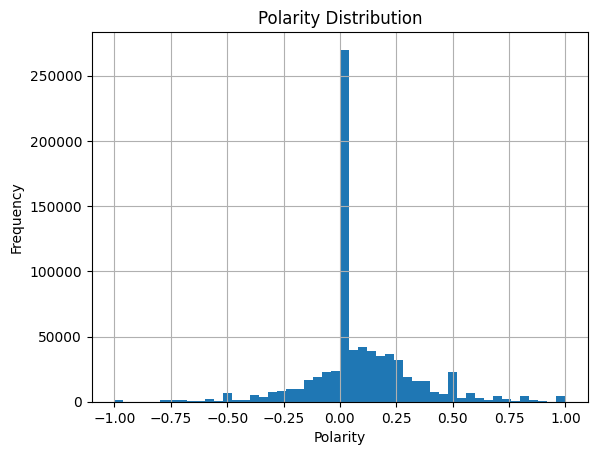

In [23]:
df["Polarity"].hist(bins=50)
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

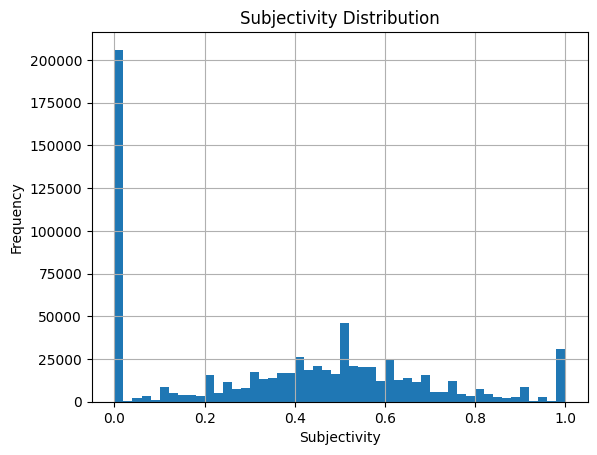

In [24]:
df["Subjectivity"].hist(bins=50)
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

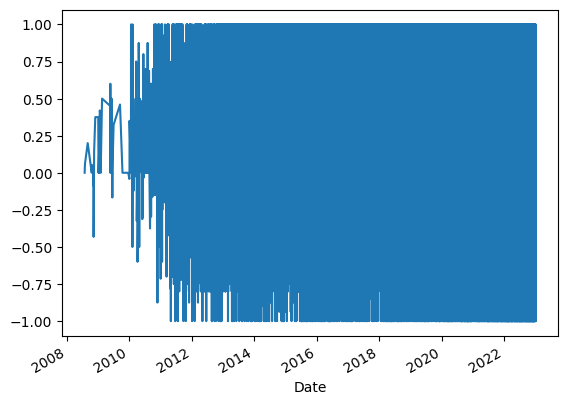

In [25]:
df["Polarity"].plot()
plt.show()

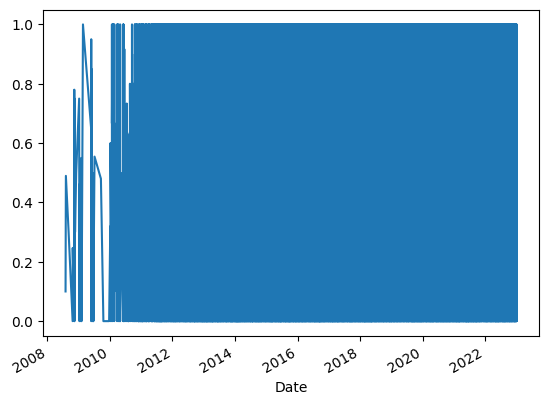

In [26]:
df["Subjectivity"].plot()
plt.show()

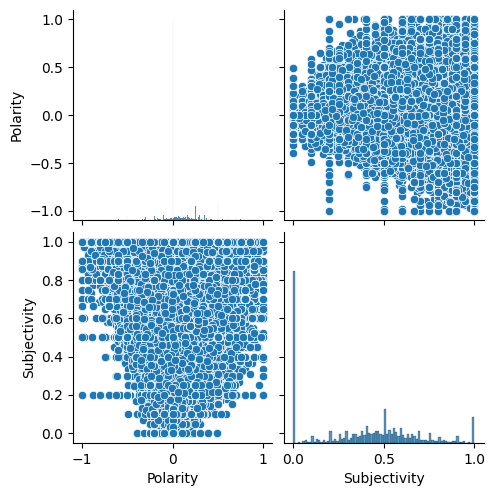

In [27]:
plt.figsize=(15, 10)
sns.pairplot(df)
plt.show()

## Detailed Graphs

In [35]:
df["Year"] = df.index.year
df["Month"] = df.index.month

# Create pivot tables for each attribute
polarity_pivot = df.pivot_table(values="Polarity", index="Month", columns="Year", aggfunc="mean", fill_value=0)
subjectivity_pivot = df.pivot_table(values="Subjectivity", index="Month", columns="Year", aggfunc="mean", fill_value=0)

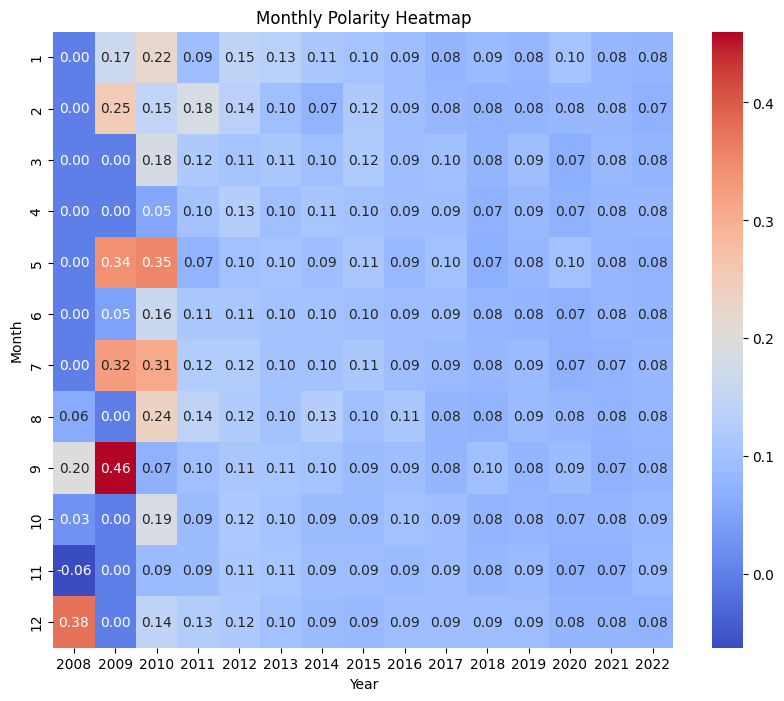

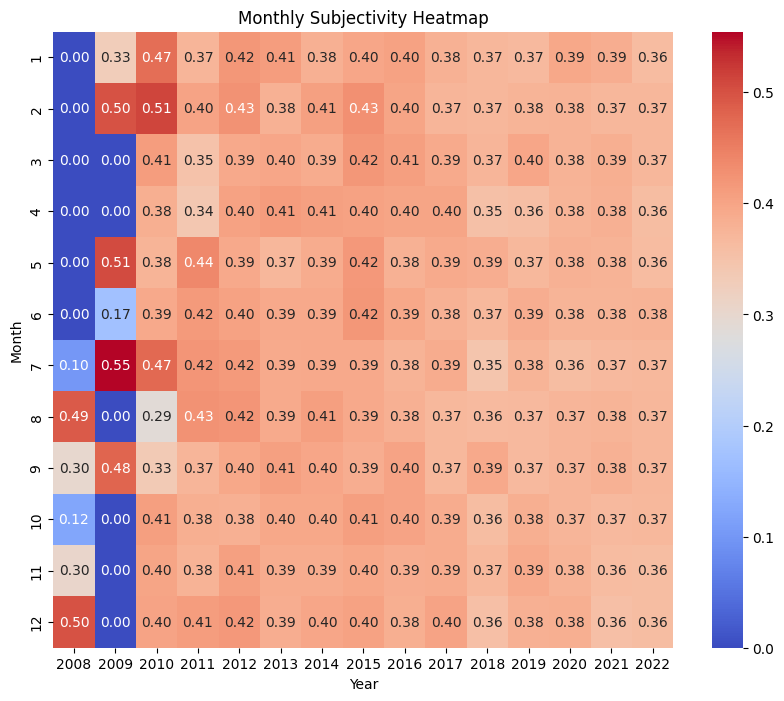

In [36]:

# Heatmap for Polarity
plt.figure(figsize=(10, 8))
sns.heatmap(polarity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Polarity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

# Heatmap for Subjectivity
plt.figure(figsize=(10, 8))
sns.heatmap(subjectivity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Subjectivity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

Getting Sentiment Distributions

In [37]:
# creating new column to categorize the sentiment
df["Sentiment"] = df["Polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))
df.head()

,Text,Polarity,Subjectivity,Year,Month,Sentiment
Date,,,,,,
2008-07-30 18:59:43,oops I added an extra is,0.000000,0.100000,2008,7,Neutral
2008-08-03 15:59:01,Something to remember in this is that the tool...,0.060417,0.489583,2008,8,Positive
2008-09-04 15:13:39,The modern witch hunt,0.200000,0.300000,2008,9,Positive
2008-10-21 07:50:04,i can quit anytime i want,0.000000,0.000000,2008,10,Neutral
2008-10-22 14:02:30,If taxes werent so damn high and wasted on she...,0.053333,0.246667,2008,10,Positive


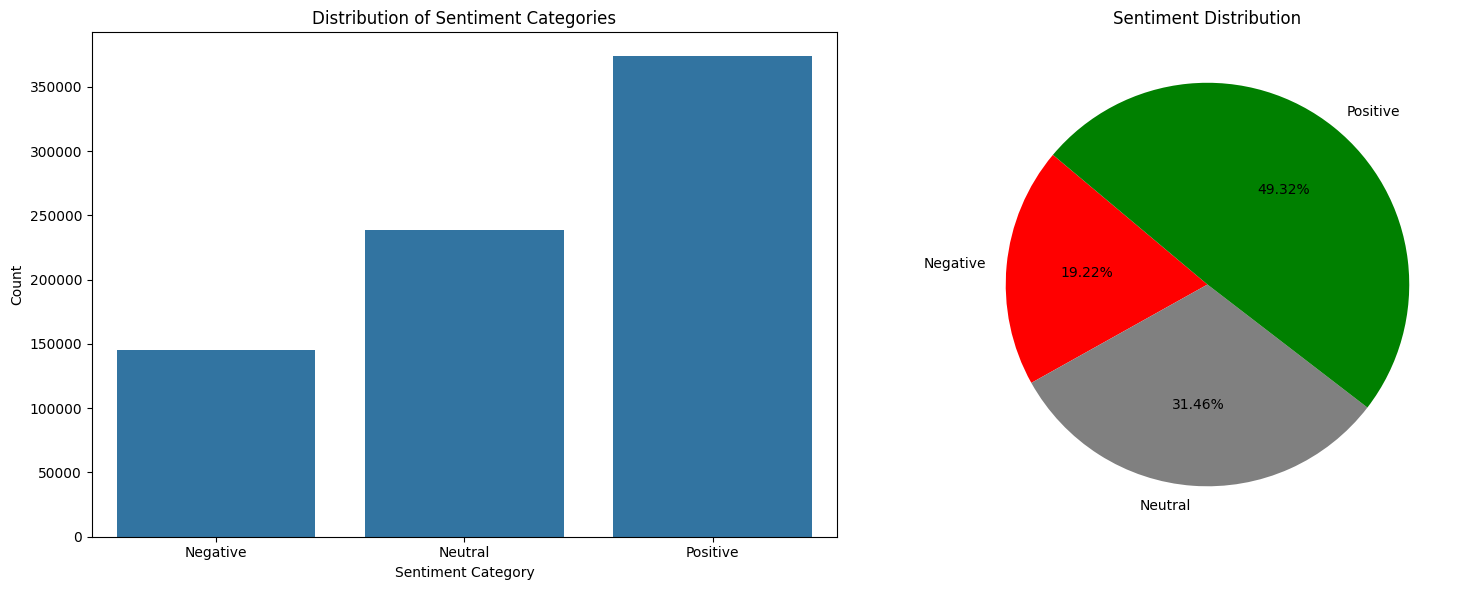

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x="Sentiment", data=df, order=["Negative", "Neutral", "Positive"], ax=ax1)
ax1.set_title("Distribution of Sentiment Categories")
ax1.set_xlabel("Sentiment Category")
ax1.set_ylabel("Count")

sentiment_counts = df["Sentiment"].value_counts()[["Negative", "Neutral", "Positive"]]

ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.2f%%", startangle=140, colors=["red", "grey", "green"])
ax2.set_title("Sentiment Distribution")

plt.tight_layout()
plt.show()


#### Sentiment Distro overall

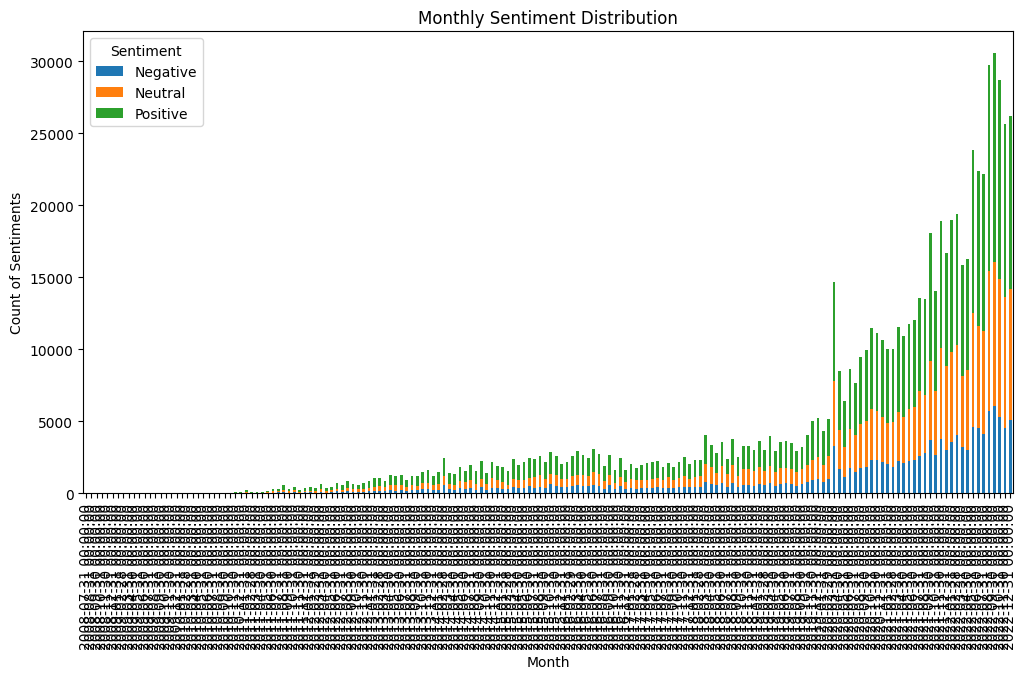

In [44]:
monthly_sentiment = df.groupby(["Sentiment"]).resample("M").size().unstack(0).fillna(0)

monthly_sentiment.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Count of Sentiments")
plt.legend(title="Sentiment")
plt.show()

#### Going into more detail each year

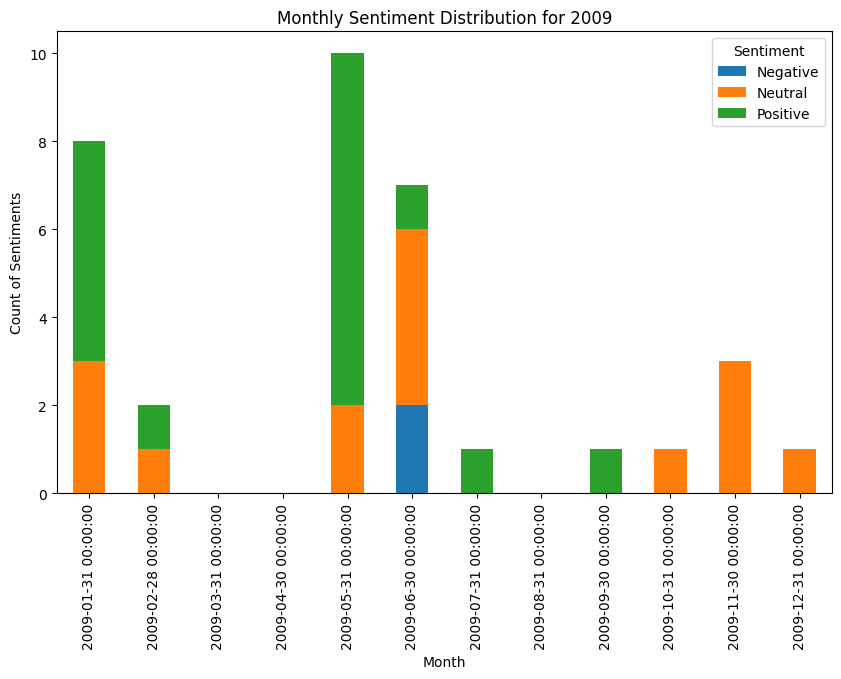

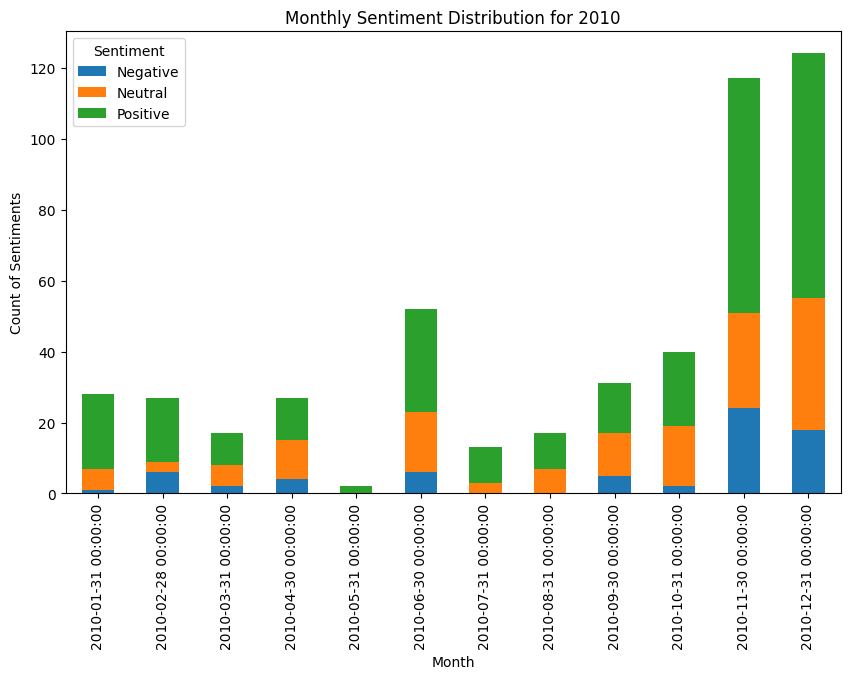

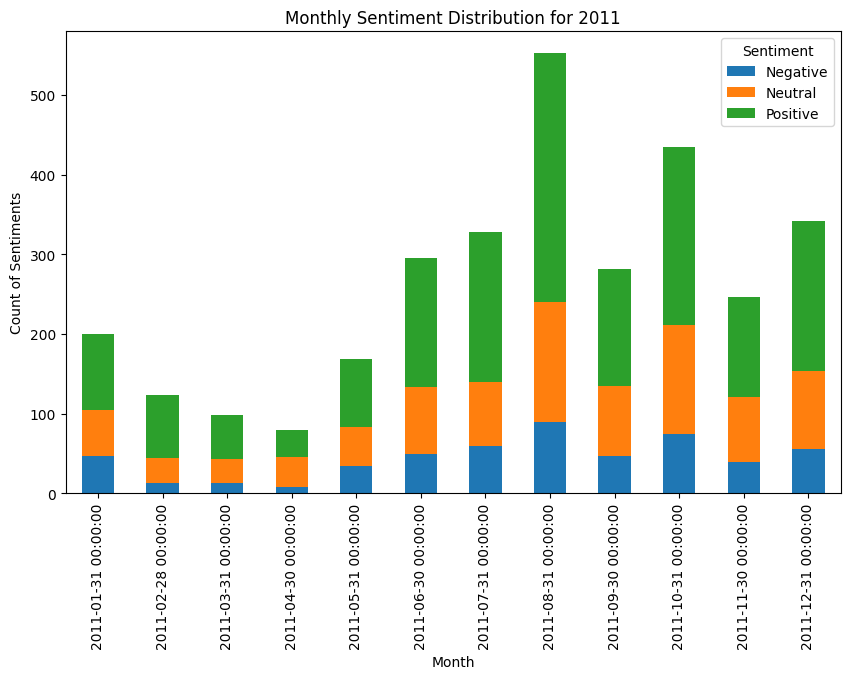

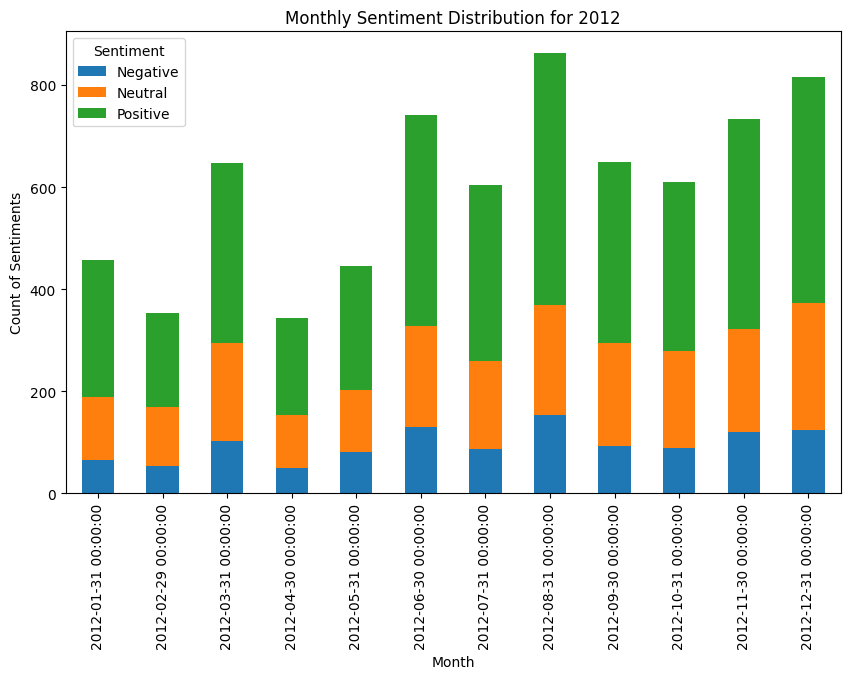

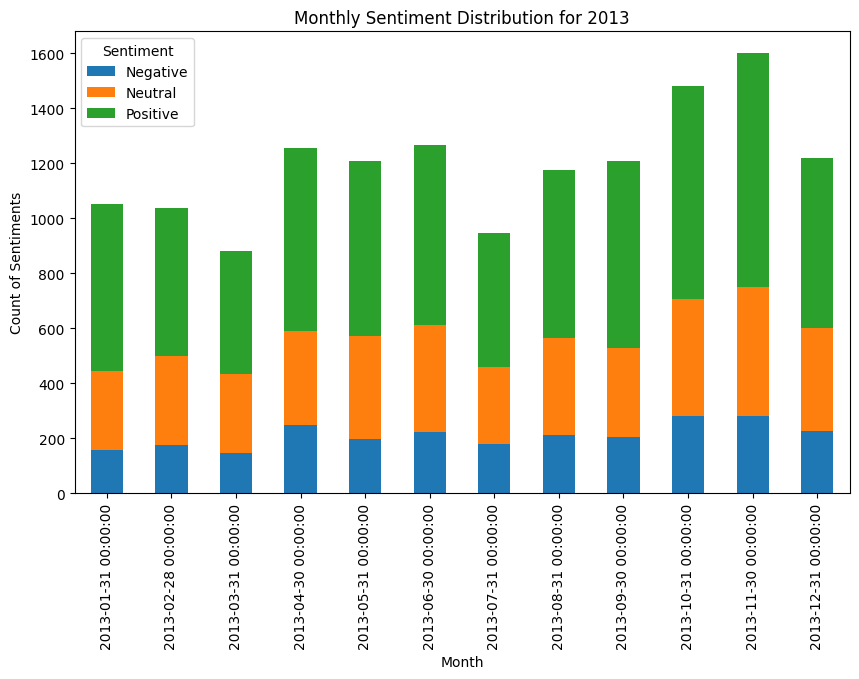

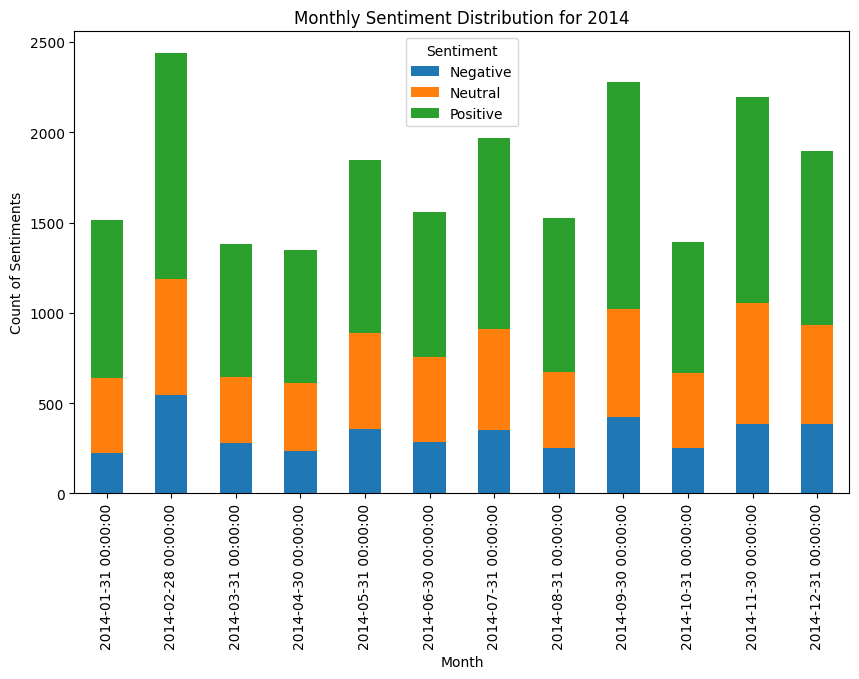

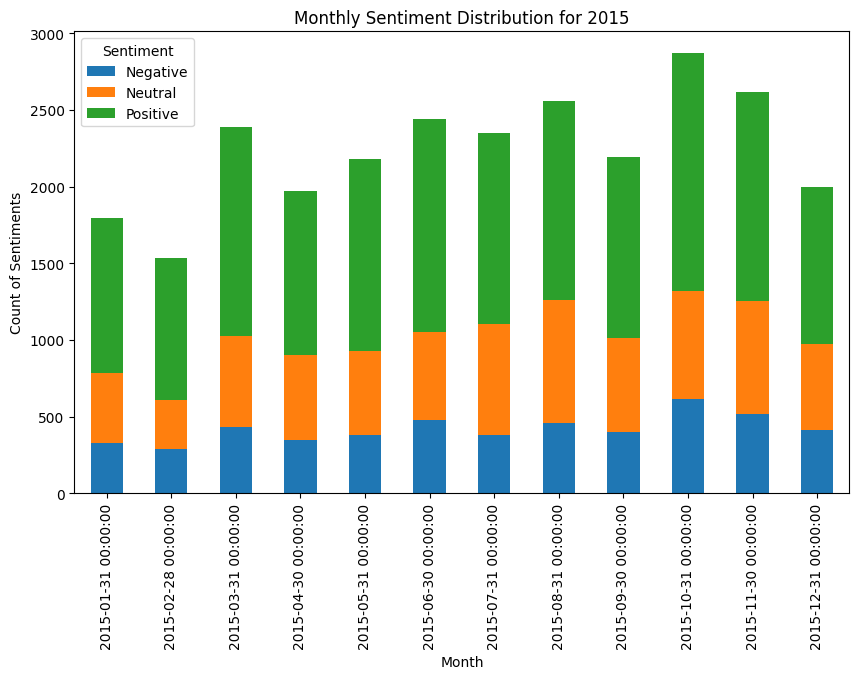

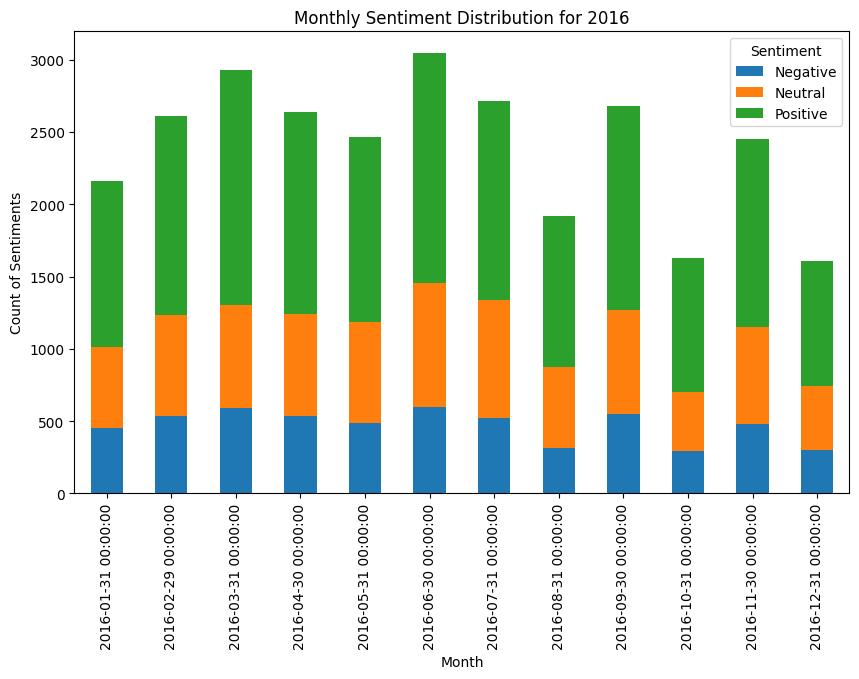

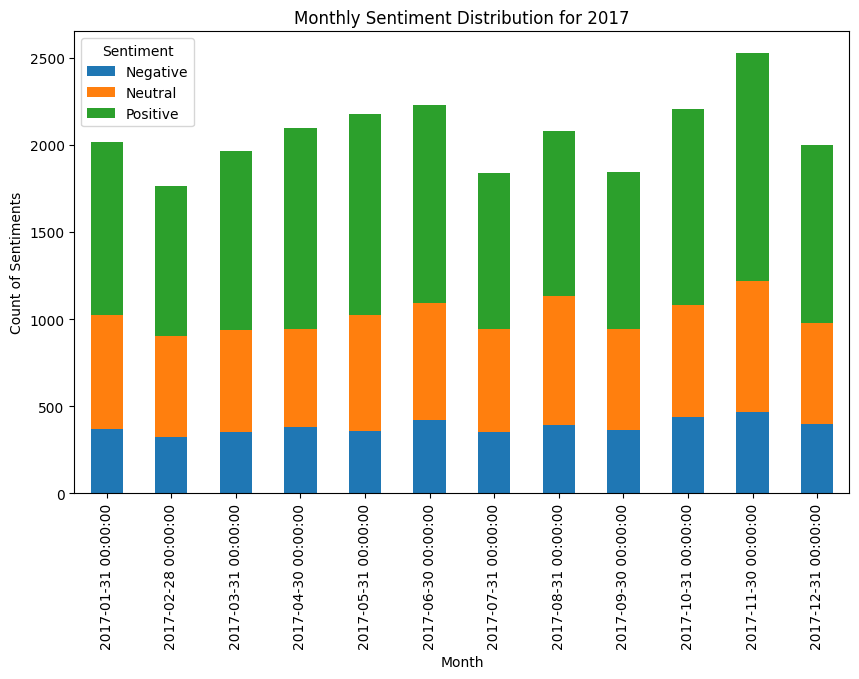

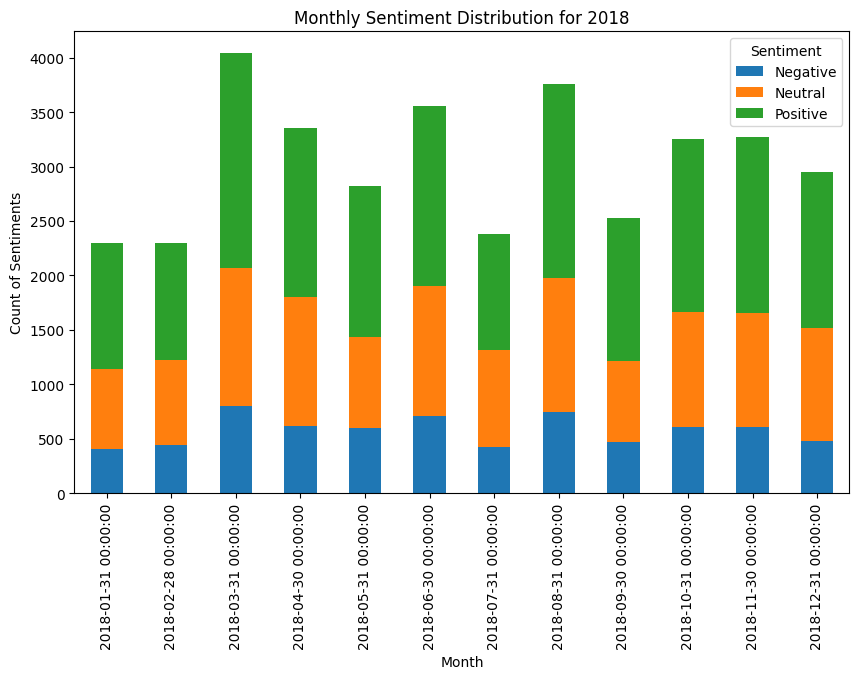

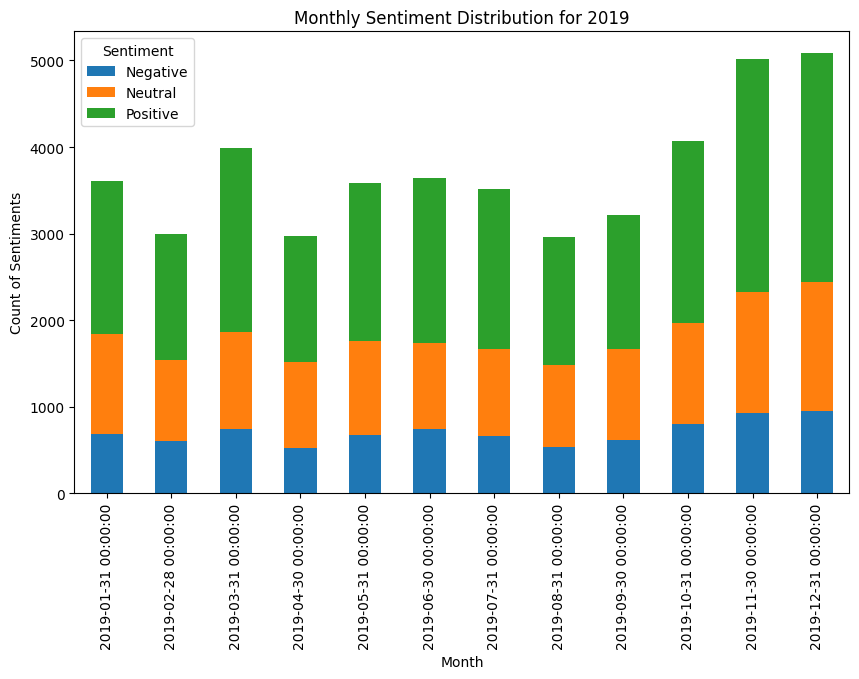

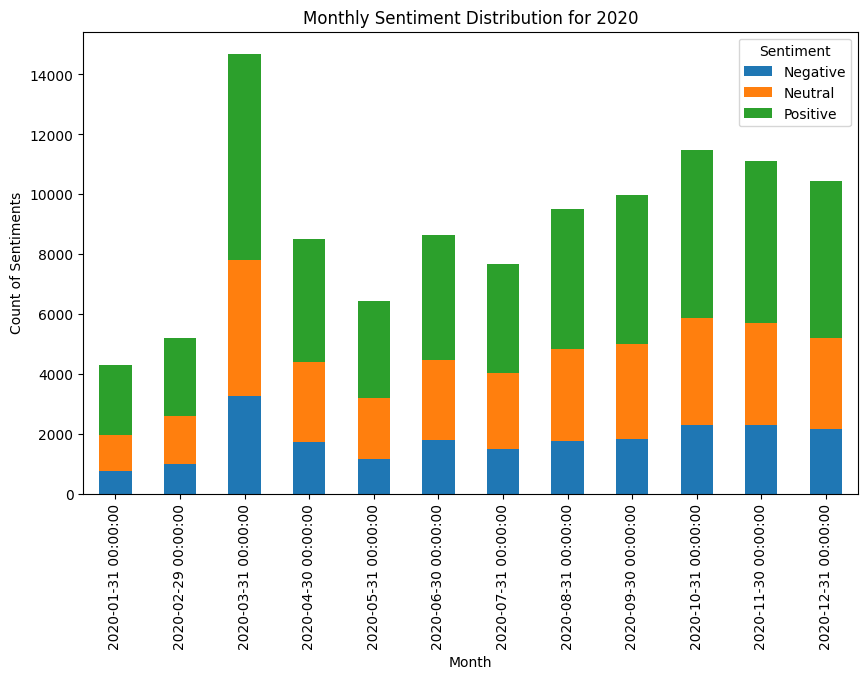

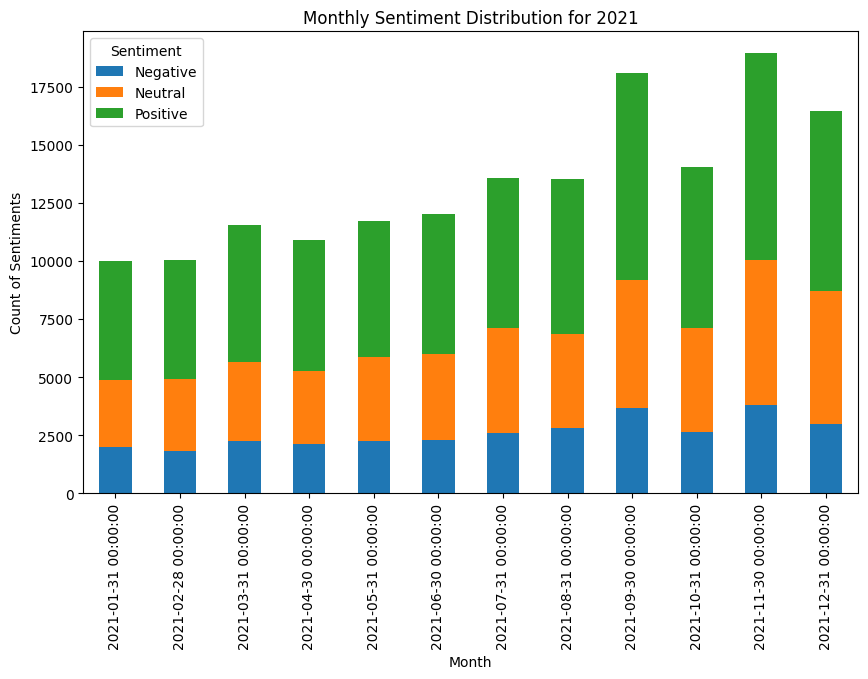

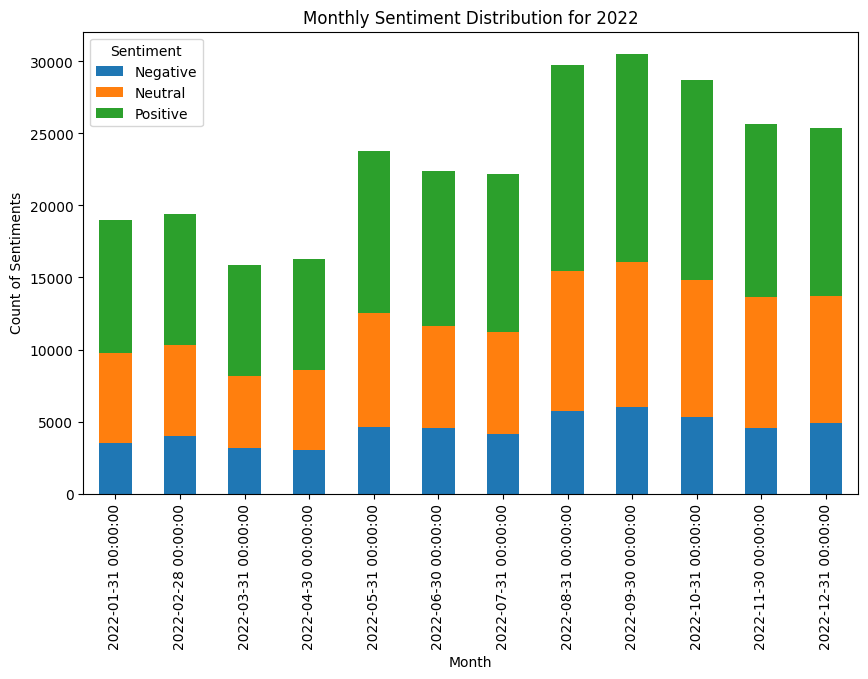

In [43]:
df.sort_index(inplace=True)
years = df.index.year.unique()

for year in years:
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)

    if start_date >= df.index.min() and end_date <= df.index.max():
        yearly_data = df[start_date:end_date]
        
        if not yearly_data.empty:
            monthly_sentiment = yearly_data.groupby("Sentiment").resample("M").size().unstack(0).fillna(0)
            
            monthly_sentiment.plot(kind="bar", stacked=True, figsize=(10, 6))
            plt.title(f"Monthly Sentiment Distribution for {year}")
            plt.xlabel("Month")
            plt.ylabel("Count of Sentiments")
            plt.legend(title="Sentiment")
            plt.show()

## Wordclouds

In [58]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
positive_texts = df[df["Sentiment"] == "Positive"]["Text"].dropna()
negative_texts = df[df["Sentiment"] == "Negative"]["Text"].dropna()

positive_text = " ".join(text for text in positive_texts)
negative_text = " ".join(text for text in negative_texts)

stopwords = set(STOPWORDS)
stopwords.update([])

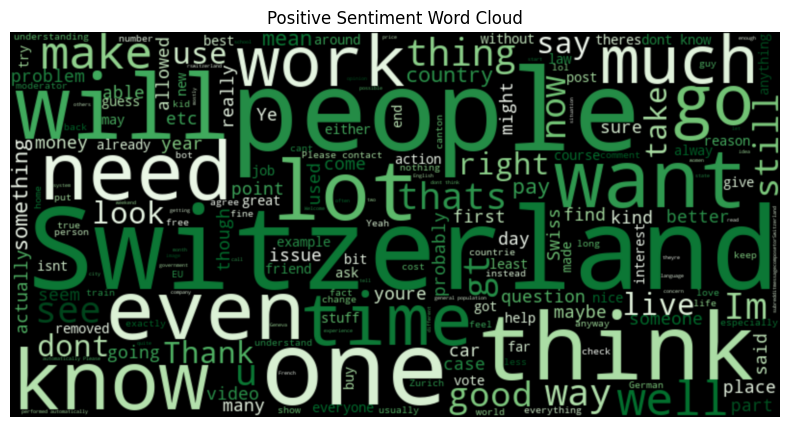

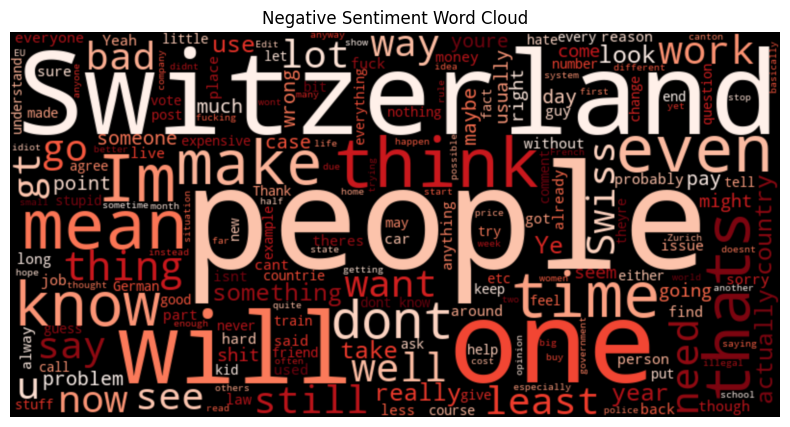

In [62]:
def create_wordcloud(text, title, colormap="viridis"):
    wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=stopwords, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bicubic")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(positive_text, "Positive Sentiment Word Cloud", colormap="Greens")
create_wordcloud(negative_text, "Negative Sentiment Word Cloud", colormap="Reds")